## Лабораторная работа №1. Байесовская оптимизация

In [1]:
from sklearn import datasets
import pandas as pd
import warnings

def warn(*args, **kwargs):
  pass

warnings.warn = warn

data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


#### Подготовливаем дополнтельные функции для дайнешей работы

In [2]:
import random

params_values_types = {
    'iterations': 'int',
    'learning_rate': 'float',
    'depth': 'int',
    'l2_leaf_reg': 'int'
}

params_min_values = {
    'iterations': 1,
    'learning_rate': 0.00001,
    'depth': 1,
    'l2_leaf_reg': 0,
    'model_size_reg': 0
}

params_max_values = {
    'iterations': 30,
    'learning_rate': 1.0,
    'depth': 16,
    'l2_leaf_reg': 30,
    'model_size_reg': 30
}


def get_random_value(name):
    if params_values_types[name] == 'int':
        return random.randint(params_min_values[name], params_max_values[name])
    elif params_values_types[name] == 'float':
        return min(max(random.random(), params_min_values[name]), params_max_values[name])
    else:
        return 0

#### Производим рандомный поиск гиперпараметров

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from tqdm import tqdm


def accuracy_by_model(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    new_model = model.fit(X_train, y_train)
    pred_y = new_model.predict(X_test)
    return accuracy_score(y_test, pred_y)


iter_count = 50
X = df.drop(["target"], axis=1)
y = df["target"]
max_accuracy_random = 0
best_params_random = {}
all_accuracy_random = list()
all_params_random = list()

for i in tqdm(range(iter_count)):
    cur_params = {}
    for name in params_values_types.keys():
        cur_params[name] = get_random_value(name)
    model = CatBoostClassifier(
        iterations=cur_params['iterations'],
        learning_rate=cur_params['learning_rate'],
        depth=cur_params['depth'],
        l2_leaf_reg=cur_params['l2_leaf_reg'],
        task_type='CPU',
        verbose=False
    )
    accuracy = accuracy_by_model(X, y, model)
    all_accuracy_random.append(accuracy)
    all_params_random.append(cur_params.values())
    if accuracy > max_accuracy_random:
        max_accuracy_random = accuracy
        best_params_random = cur_params

print(best_params_random)
print(max_accuracy_random)

100%|██████████| 40/40 [02:51<00:00,  4.29s/it]

{'iterations': 17, 'learning_rate': 0.7276751139697383, 'depth': 13, 'l2_leaf_reg': 13}
0.9840425531914894


#### Запоминаем результаты рандома

In [ ]:
f1 = pd.DataFrame(all_params_random.copy(), columns=params_values_types.keys())
f2 = pd.DataFrame(all_accuracy_random)
pd.concat([f1, f2], axis=1).to_csv('random_data.csv')

#### Подготовливаем тренировочный датасет для сурогатной функции

In [4]:
start_count = 20
data = list()
labels = list()

for i in tqdm(range(start_count)):
    cur_params = {}
    for name in params_values_types.keys():
        cur_params[name] = get_random_value(name)
    model = CatBoostClassifier(
        iterations=cur_params['iterations'],
        learning_rate=cur_params['learning_rate'],
        depth=cur_params['depth'],
        l2_leaf_reg=cur_params['l2_leaf_reg'],
        task_type='CPU',
        verbose=False
    )
    data.append(cur_params.values())
    labels.append(accuracy_by_model(X, y, model))

100%|██████████| 20/20 [02:07<00:00,  6.40s/it]


#### С помощью алгоритма байесовской оптимизации ищем наилучшие параметры

In [11]:
import math
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor

modelGP = GaussianProcessRegressor()
new_data = pd.DataFrame(all_params_random.copy(), columns=params_values_types.keys())
modelGP.fit(new_data, all_accuracy_random)
new_labels = all_accuracy_random.copy()

all_accuracy_bais = list()
all_params_bais = list()
X = df.drop(["target"], axis=1)
y = df["target"]

for i in tqdm(range(iter_count)):
    new_params = list()
    for j in range(100):
        cur_params = {}
        for name in params_values_types.keys():
            cur_params[name] = get_random_value(name)
        new_params.append(cur_params.values())
    m_max = 0
    best_params = list()
    for j in range(100):
        cur_data_params = pd.DataFrame(pd.DataFrame(new_params[j]).transpose().values,
                                       columns=params_values_types.keys())
        (pred, std) = modelGP.predict(cur_data_params, return_std=True)
        m = norm.cdf((pred - max(new_labels)) / std)
        if m > m_max:
            best_params = cur_data_params
            m_max = m
    model = CatBoostClassifier(
        iterations=best_params['iterations'][0],
        learning_rate=best_params['learning_rate'][0],
        depth=best_params['depth'][0],
        l2_leaf_reg=best_params['l2_leaf_reg'][0],
        task_type='CPU',
        verbose=False
    )
    model.fit(X, y)
    cur_accuracy = accuracy_by_model(X, y, model)
    new_labels.append(cur_accuracy)
    all_accuracy_bais.append(cur_accuracy)
    all_params_bais.append(best_params.values)
    new_data = pd.concat([new_data, best_params])
    modelGP.fit(new_data, new_labels)
print(max(all_accuracy_bais))

  2%|▎         | 1/40 [00:29<18:56, 29.15s/it]


KeyboardInterrupt: 

#### Сохраняем результаты раброты байесовской оптимизации

In [ ]:
t = list()
for m in all_params_bais:
    t.append(m[0])
f1 = pd.DataFrame(t.copy(), columns=params_values_types.keys())
f2 = pd.DataFrame(all_accuracy_bais)
pd.concat([f1, f2], axis=1).to_csv('bias_data.csv')

#### Строим соотвествующие графики для анализа

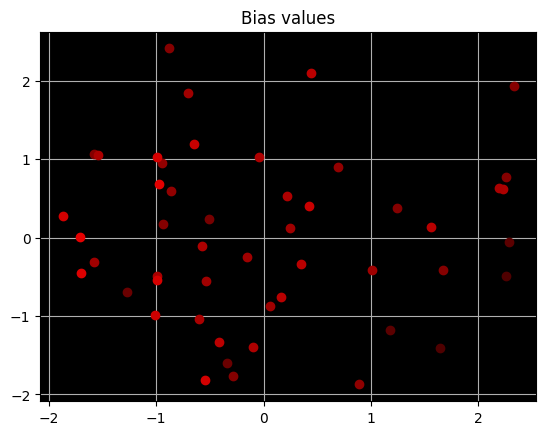

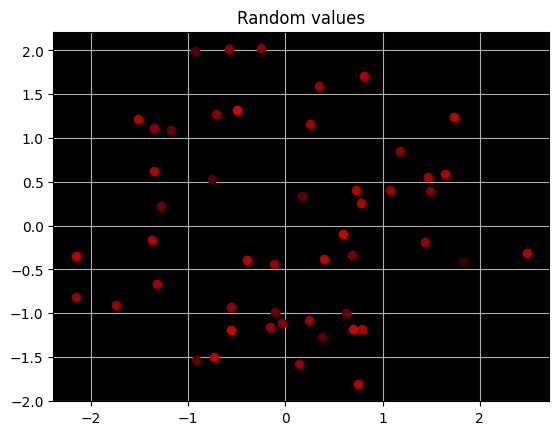

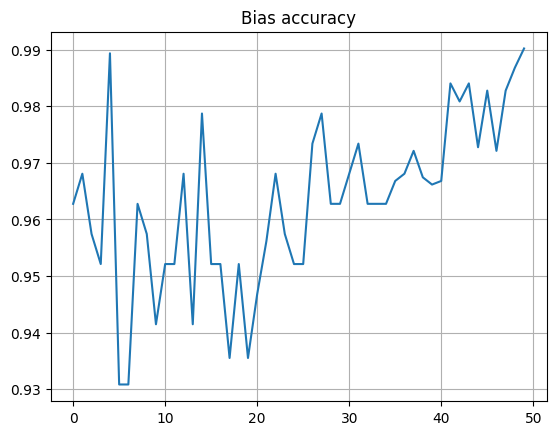

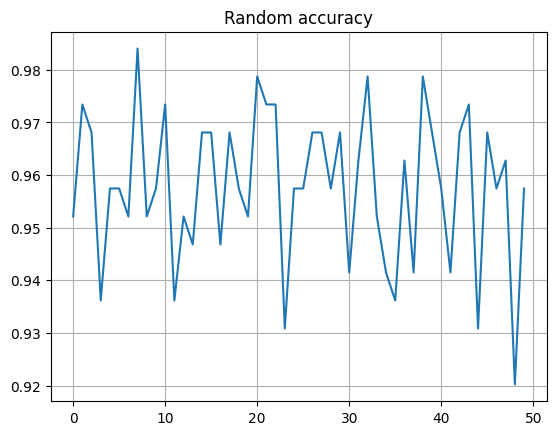

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


def colorFader(c1, c2, mix=0):
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1 - mix) * 10 * c1 + (mix - 0.9) * 10 * c2)


def draw_plot(title, name):
    pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])
    data = pd.read_csv(name)
    X = list()
    y = list()
    for col in data:
        if params_values_types.keys().__contains__(col):
            X.append(data[col])
        else:
            y.append(data[col])
    X = pipeline.fit_transform(pd.concat(X, axis=1))
    y = pd.concat(y, axis=1).iloc[:, 1]
    fig, ax = plt.subplots()
    ax.set_facecolor((0.0, 0.0, 0.0))
    plt.grid(True)
    plt.title(title)
    c1 = '#000000'
    c2 = '#ff0000'
    for xy, accuracy in zip(X, y):
        if accuracy >= 0.9:
            ax.plot(xy[0], xy[1], 'o', color=colorFader(c1, c2, accuracy))
    plt.show()


def draw_plot_2(title, name):
    data = pd.read_csv(name)
    y = list()
    for col in data:
        if not params_values_types.keys().__contains__(col):
            y.append(data[col])
    y = pd.concat(y, axis=1).iloc[:, 1]
    plt.figure()
    X = list()
    plt.title(title)
    for t in range(len(y)):
        X.append(t)
    plt.plot(X, y)
    plt.grid(True)
    plt.show()


draw_plot("Bias values", 'bias_data.csv')
draw_plot("Random values", 'random_data.csv')

draw_plot_2("Bias accuracy", 'bias_data.csv')
draw_plot_2("Random accuracy", 'random_data.csv')